In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [2]:
# load training data

mnist_training_df = pd.read_csv('mnist_train.csv')

mnist_training_df

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# load test data

mnist_test_df = pd.read_csv('mnist_test.csv')

mnist_test_df

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Get input and output values from training file

X = mnist_training_df.iloc[:,1:785].values
y = mnist_training_df.iloc[:,0].values

print(X.shape)
print(y.shape)

(60000, 784)
(60000,)


In [5]:
# get input and output values from test file

X_test = mnist_test_df.iloc[:,1:785].values
y_test = mnist_test_df.iloc[:,0].values

print(X_test.shape)
print(y_test.shape)

(10000, 784)
(10000,)


In [6]:
from sklearn.model_selection import train_test_split

# split training data into training and development.  Development size 17% so it is about the same size as the test set

X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.17, random_state=42)

The training set is to train our model so it can make predictions.  It has the inputs and knows the outputs so we are teaching it what to expect for new data it has not encountered before.

The development set is to help prune decision trees in order to prevent overfitting.  You generate an unpruned tree, then test it against the development data to help you to prune it.  This prevents you from using the test set to prune the tree which would result in unreliable results in the final pruned tree as the test data would have already been seen by the model.

The test set is to test the model with data it has not come across before and to compare the results against the y value of the test set to see how accurate it is in predicting the data.

In [7]:
# Create random forest model

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(max_depth=10, n_estimators=100, max_features='auto')
rf_model.fit(X_train, y_train)

C:\Users\bhaka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=10, max_features='auto')

Going to use max_features as the parameter to fine tune as I read this is one of the most important parameters to fine tune in a Random Forest and can affect it the most. Too small a value will create bias and too large a number will increase variance.  So it is important to get the right balance.

In [11]:
# Accuracy of auto against development set

print(f"Score with auto for max_features: {rf_model.score(X_dev, y_dev)}") 

Score with auto for max_features: 0.9483333333333334


In [12]:
# check model on dev set with None

rf_model = RandomForestClassifier(max_depth=10, n_estimators=100, max_features=None)
rf_model.fit(X_train, y_train)
print(f"Score with None for max_features: {rf_model.score(X_dev, y_dev)}") 

Score with None for max_features: 0.9364705882352942


In [13]:
# check model on dev set with sqrt

rf_model = RandomForestClassifier(max_depth=10, n_estimators=100, max_features='sqrt')
rf_model.fit(X_train, y_train)
print(f"Score with sqrt for max_features: {rf_model.score(X_dev, y_dev)}") 

Score with sqrt for max_features: 0.9457843137254902


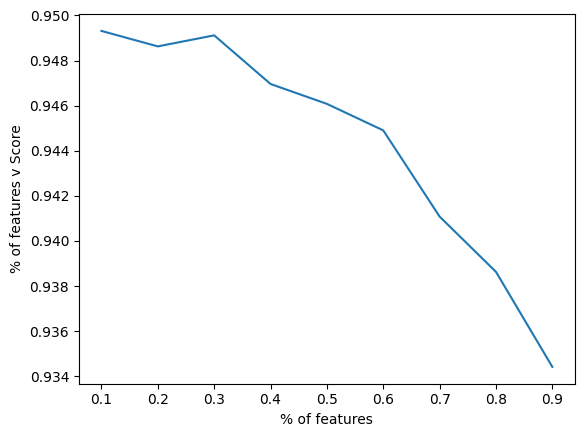

In [8]:
# create graph of percentage of features against score

# declare lists
max_features_list = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
score_list = []

# loop through each percentage and generate score
for index, value in enumerate(max_features_list):

    rf_model = RandomForestClassifier(max_depth=10, n_estimators=100, max_features=value)
    rf_model.fit(X_train, y_train)
    score_list.append(rf_model.score(X_dev, y_dev))
    
#plot graph
plt.plot(max_features_list, score_list)
plt.xlabel('% of features')
plt.ylabel('Score')
plt.ylabel('% of features v Score')
plt.show()


In [12]:
# check model with 10% of features

rf_model = RandomForestClassifier(max_depth=10, n_estimators=100, max_features=0.1)
rf_model.fit(X_train, y_train)
print(f"Score with 10% for max_features: {rf_model.score(X_dev, y_dev)}") 

Score with 10% for max_features: 0.9491176470588235


In [13]:
# check model with 30% of features

rf_model = RandomForestClassifier(max_depth=10, n_estimators=100, max_features=0.3)
rf_model.fit(X_train, y_train)
print(f"Score with 30% for max_features: {rf_model.score(X_dev, y_dev)}") 

Score with 30% for max_features: 0.9485294117647058


Looking at the results the best value for the parameter appears to be max_features=0.1 as it had the highest score (0.949..) so will use this for the test data.

In [14]:
# Generate model with optimum parameter for testing against test set
rf_model = RandomForestClassifier(max_depth=10, n_estimators=100, max_features=0.1)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test).reshape(-1,1)

In [23]:
# Make confusion  matrix
from sklearn.metrics import confusion_matrix

mnist_test_series = mnist_test_df['label'].sort_values().unique()

classes = list(mnist_test_series)
conf_mat = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(conf_mat, columns=classes, index=classes)
cm_df

,0,1,2,3,4,5,6,7,8,9
0,970,1,0,1,0,3,2,1,2,0
1,0,1120,3,3,1,1,3,1,3,0
2,7,2,974,6,9,1,7,15,7,4
3,4,1,15,941,1,17,0,13,13,5
4,1,0,1,0,921,1,7,0,3,48
5,6,7,0,14,4,831,12,4,5,9
6,10,3,1,0,7,8,920,0,9,0
7,1,7,23,2,2,0,0,964,5,24
8,3,2,6,7,6,6,7,4,910,23
9,6,7,1,13,18,7,1,4,9,943


From the confusion matrix we can see that the number with the highest false positives are 3, 9, 7, 8, 4, 5 and 2.

False positive count below:
    
0 - 10 FP

1 - 15 FP

2 - 58 FP

3 - 69 FP

4 - 61 FP

5 - 61 FP

6 - 38 FP

7 - 64 FP

8 - 64 FP

9 - 66 FP

This is understandable as there will be a margin of error where handwritten numbers will either not be written correctly or due to handwritting may look like other numbers.  But the percentage is very small in comparison to the true positives.

In [18]:
# calculate accuracy, precision, recall and f1 score

from sklearn.metrics import precision_score, recall_score, f1_score

accuracy = rf_model.score(X_test, y_test)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

print(f"Accuracy score: {accuracy}")
print(f"Precision score: {precision}")
print(f"Recall score: {recall}")
print(f"F1 score: {f1}")

Accuracy score: 0.9494
Precision score: 0.9494
Recall score: 0.9494
F1 score: 0.9494
